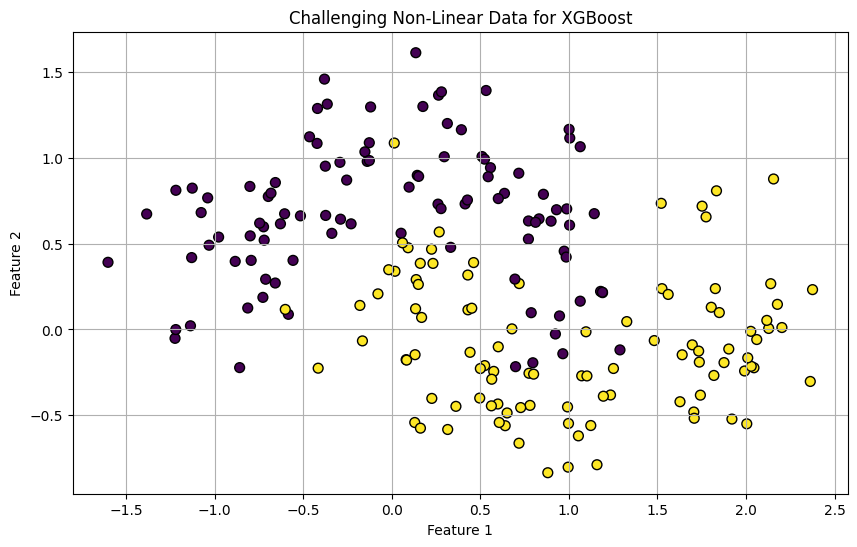

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# --- 1a: Generate the "moons" dataset ---
# We'll add a bit more noise to make it challenging
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)


# --- 1b: Visualize the Data ---
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

plt.title('Challenging Non-Linear Data for XGBoost')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [9]:
# Make sure you have installed the library first!
import xgboost as xgb # pyright: ignore[reportMissingImports]
from sklearn.metrics import accuracy_score

# --- 2a: Create an instance of the XGBoost model ---
# We'll set a few key hyperparameters:
# n_estimators: The number of trees to build in the sequence (the size of the "team").
# max_depth: The maximum depth of each individual tree. Shorter trees prevent overfitting.
# learning_rate: How much each new tree's prediction is weighted. A smaller rate is more robust.
# use_label_encoder=False and eval_metric='logloss' are set to avoid deprecation warnings.
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# --- 2b: Train the model ---
# The .fit() method will now build the 100 trees in sequence, each one correcting the last.
print("--- Training the XGBoost model ---")
model.fit(X, y)
print("--- Training Complete ---")

# --- 2c: Evaluate the model on the training data ---
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"\nThe accuracy of our XGBoost model is: {accuracy * 100:.2f}%")

--- Training the XGBoost model ---
--- Training Complete ---

The accuracy of our XGBoost model is: 99.00%


C:\Users\pa350\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:27:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


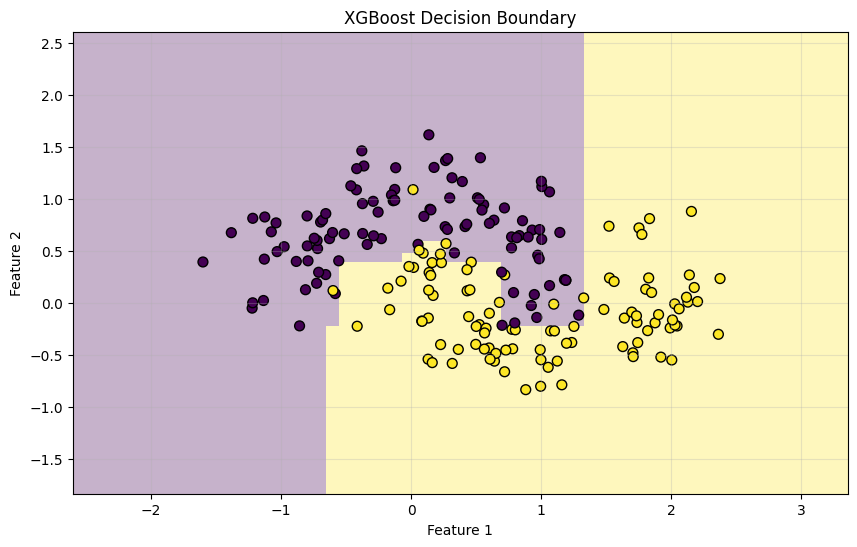

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    """
    A generic helper function to plot the decision boundary for a classifier.
    """
    plt.figure(figsize=(10, 6))
    
    # 1. Define color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # For background
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # For data points

    # We are using a different color scheme here to match the data generation
    # cmap_light = ListedColormap(['#FFFACD', '#D0EAFB']) # LemonChiffon, LightSkyBlue
    # cmap_bold = ListedColormap(['#FFD700', '#1E90FF'])  # Gold, DodgerBlue
    
    # 2. Create a grid to evaluate the model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 3. Make predictions on every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 4. Plot the decision regions
    plt.pcolormesh(xx, yy, Z, cmap='viridis', alpha=0.3)

    # 5. Plot the original training points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("XGBoost Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)
    plt.show()

# --- Call the function to create the plot for our trained XGBoost model ---
plot_decision_boundary(model, X, y)